<a href="https://colab.research.google.com/github/Akshay1781/customer-segmentation-using-k-means-clustering-/blob/main/Customer_Segmentation_using_k_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#Top 5 observations
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#bottom 5 observations
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
#finding the numbers of rows and columns
df.shape

(200, 5)

In [8]:
#getting the information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.rename(columns= {'Annual Income (k$)':'Annual_income','Spending Score (1-100)' : 'Spending_score'}, inplace=True)

In [10]:
#checking for missing values in the datasets for each columns
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

# choosing the annual income columns and spending score columns

In [11]:
X = df.iloc[:,3:]


In [12]:
print(X)

     Annual_income  Spending_score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


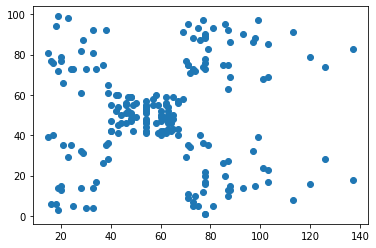

In [13]:
plt.scatter(df['Annual_income'],df['Spending_score'])

# choosing the correct number of structure

In [14]:
#WCSS = within Cluster Sum of Squares
#Elbow Method

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

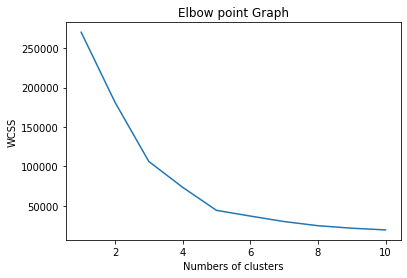

In [15]:
#plot the elbow plot


plt.plot(range(1,11), wcss)
plt.title("Elbow point Graph")
plt.xlabel("Numbers of clusters")
plt.ylabel('WCSS')
plt.show()

# optimum numbers of cluster are 5

# Training the k-means clustering model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

#return a label for each data point based on there cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [19]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [17]:
df['Cluster'] = Y
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


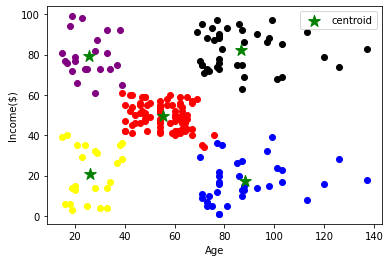

In [25]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]
df4 = df[df['Cluster'] == 3]
df5 = df[df['Cluster'] == 4]

plt.scatter(df1.Annual_income, df1['Spending_score'], color='blue')
plt.scatter(df2.Annual_income, df2['Spending_score'], color='red')
plt.scatter(df3.Annual_income, df3['Spending_score'], color='black')
plt.scatter(df4.Annual_income, df4['Spending_score'], color='purple')
plt.scatter(df5.Annual_income, df5['Spending_score'], color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='green',s=150,marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()